1. ANN에서는 은닉계층이 하나였습니다. DNN은 수십에서 수백개의 은닉 계층으로 구성
- DNN에서는 Sigmoid 함수처럼 입력을 특정 범위로 줄이는 활성화 함수들은 Vanishing Gradient 문제가 발생할 수 있습니다.  Vanishing Gradient 극복하는 활성함수 ReLu 함수를 사용 
- 다중 분류 시 활성 함수는 Softmax를 많이 사용 



## 분류 DNN 

MNIST 손글씨 데이터(0~9) 분류하기 (여러 개의 은닉계층을 사용) <br>

### dropout 적용

Using TensorFlow backend.


60000 28 28
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 32us/step - loss: 1.4792 - accuracy: 0.5657 - val_loss: 0.6931 - val_accuracy: 0.8512
Epoch 2/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.6807 - accuracy: 0.8012 - val_loss: 0.4368 - val_accuracy: 0.8863
Epoch 3/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.5276 - accuracy: 0.8425 - val_loss: 0.3640 - val_accuracy: 0.9008
Epoch 4/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.4608 - accuracy: 0.8635 - val_loss: 0.3270 - val_accuracy: 0.9085
Epoch 5/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.4195 - accuracy: 0.8773 - val_loss: 0.3008 - val_accuracy: 0.9139
Epoch 6/100
48000/48000 [==============================] - 1s 31us/step - loss: 0.3849 - accuracy: 0.8863 - val_loss: 0.2813 - val_accuracy: 0.9196
Epoch 7/100
48000/48000 [=========================

48000/48000 [==============================] - 1s 30us/step - loss: 0.1185 - accuracy: 0.9638 - val_loss: 0.1062 - val_accuracy: 0.9685
Epoch 56/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1159 - accuracy: 0.9657 - val_loss: 0.1052 - val_accuracy: 0.9691
Epoch 57/100
48000/48000 [==============================] - 1s 31us/step - loss: 0.1163 - accuracy: 0.9656 - val_loss: 0.1049 - val_accuracy: 0.9684
Epoch 58/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1131 - accuracy: 0.9664 - val_loss: 0.1042 - val_accuracy: 0.9688
Epoch 59/100
48000/48000 [==============================] - 1s 31us/step - loss: 0.1128 - accuracy: 0.9662 - val_loss: 0.1035 - val_accuracy: 0.9695
Epoch 60/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1103 - accuracy: 0.9682 - val_loss: 0.1029 - val_accuracy: 0.9695
Epoch 61/100
48000/48000 [==============================] - 1s 30us/step - loss: 0.1097 - accuracy: 0.9676 - val_loss: 

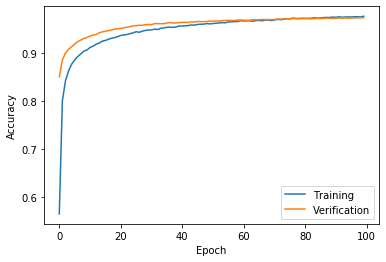

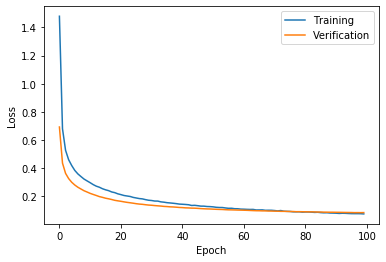

In [1]:
# Modeling
from keras import layers, models
from keras.optimizers import Adam


def DNN_seq_func(Nin, Nh_l, Nout):
    model = models.Sequential()

    """오차(비용) 함수는 categorical_crossentropy, <--(활성함수를 softmax를 사용함으로)
       최적화 함수는 adam 을 사용. SGD(확률적경사하강법) 써도 됨 
       Classification Performance metrics(분류 성능 척도) 는 'accuracy'
    """
    model.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin,)))
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(Nh_l[1], activation='relu' ))
    model.add(layers.Dropout(0.1))
    
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy']  )
    
    return model


# Data
from keras import datasets  # mnist
from keras.utils import np_utils  # to_categorical

def Data_func():
    
    '''
    이미지 데이터 X ,  0~9까지 붙인 이름표를 Y   
    70,000개의 데이터 중 60,000개를 학습 데이터로,  10,000개를 테스트 데이터로 읽어옵니다. 
    '''
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    
    '''
    원-핫 인코딩을 위해 케라스의 np_utils 의 to_categorical() 함수를 사용
     0 ~ 9까지의 정수 값을 갖는 형태가 아닌 0 이나 1로 이뤄진 벡터로 수정 
     만약에 '3' 이라는 숫자이라면 [0, 0, 1, 0, 0, 0, 0, 0, 0]으로 변환 
    '''
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
   

    L, W, H = X_train.shape 
    print(L, W, H)  #60000 28 28
    
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)
    '''
    행 갯수는 상관없고, 열은 28*28(-> 784 )로 reshape 
    '''
 
    #원래 데이터가 0~255 인데 0~1로  변환
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    

    return (X_train, Y_train), (X_test, Y_test)


# Main   
import matplotlib.pyplot as plt
%matplotlib inline

def main():
    Nin = 784
    Nh_l = [100, 50]
    number_of_class = 10
    Nout = number_of_class

    model = DNN_seq_func(Nin, Nh_l, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()

    # Training
    history = model.fit(X_train, Y_train, epochs=100, batch_size=100, validation_split=0.2)
    

    performace_test = model.evaluate(X_test, Y_test, batch_size=100)
    """평가 """
    print('Test Loss and Accuracy ->', performace_test)


    history = history.history


    """정확도 변화 추이  그래프"""
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


    """Cost/Loss  변화 추이 그래프"""
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Verification'], loc=0)
    plt.show()


if __name__ == '__main__':
    main()

### ModelCheckpoint, EarlyStopping

학습이 진행될수록 학습셋의 정확도는 향상되나 과적합으로 인해 테스트셋의 
실험 결과는 점점 나빠지는 현상이 발생되기도 함 <br>
테스트셋 오차가 줄지 않으면 학습을 멈추게 하는 Keras API

* 10회 이상 모델의 성과 향상이 없을 경우 자동으로 학습 중단

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.datasets import mnist
from keras.utils import np_utils

import numpy
import sys
import os

In [3]:
seed = 0
numpy.random.seed(seed)

# mnist에서 데이터셋 불러오기
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

# 차원 변환  숫자 하나가 가로 28 * 28 즉 784 개의 점으로 구성된 2차원 구조
''' 정규화
차원 변환 단계 
- 0~255까지의 숫자로 구성된 이미지 데이터(2차원)
- 1차원으로 차원 변환 
- 0과 1에 해당하는 구조로 변환  : float으로 변환후에 255로 나눔
'''
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype("float64")
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 분류를 위한 사전 작업 : 원핫 벡터
# 0~9 : 1 [0, 1, 0, 0, 0,...]
Y_train = np_utils.to_categorical(Y_class_train, 10)
Y_test = np_utils.to_categorical(Y_class_test, 10)
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [4]:
# 모델 설정
#? 총 784개의 속성과 10개의 클래스 
# input data = 784/ 512로 은닉층으로 전송, 활성화 함수 : relu
model = Sequential()
#은닉층
model.add(Dense(512, input_dim=784, activation='relu'))
#출력층
model.add(Dense(10, activation='softmax'))

In [5]:
# 모델 최적화
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

    
    
'''
ModelCheckpoint 기능 : 에포크 마다 현재 가중치를 저장
filepath : 모델 파일 경로
monitor : val_loss가 좋아지지 않으면 모델 파일을 덮어쓰지 않음
'''
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath,    
                               monitor='val_loss', 
                               verbose=1, 
                               save_best_only=True)

# ? 모니터할 값과 테스트 오차가 좋아지지 않아도 10번까지는 기다린다는 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


In [7]:
# 모델의 실행
# 200 개를 모두 30번 실행
# 테스트 셋으로 최종 모델의 성과를 측정 및 값 출력
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])

print("\Test accuracy : %.4f" %(model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15335, saving model to ./model/01-0.1533.hdf5

Epoch 00002: val_loss improved from 0.15335 to 0.10429, saving model to ./model/02-0.1043.hdf5

Epoch 00003: val_loss improved from 0.10429 to 0.08373, saving model to ./model/03-0.0837.hdf5

Epoch 00004: val_loss improved from 0.08373 to 0.07775, saving model to ./model/04-0.0778.hdf5

Epoch 00005: val_loss improved from 0.07775 to 0.06956, saving model to ./model/05-0.0696.hdf5

Epoch 00006: val_loss improved from 0.06956 to 0.06335, saving model to ./model/06-0.0633.hdf5

Epoch 00007: val_loss did not improve from 0.06335

Epoch 00008: val_loss improved from 0.06335 to 0.06134, saving model to ./model/08-0.0613.hdf5

Epoch 00009: val_loss improved from 0.06134 to 0.05907, saving model to ./model/09-0.0591.hdf5

Epoch 00010: val_loss did not improve from 0.05907

Epoch 00011: val_loss did not improve from 0.05907

Epoch 00012: val_loss did not improve from 0.05907

Epoch 00013: val_loss did n

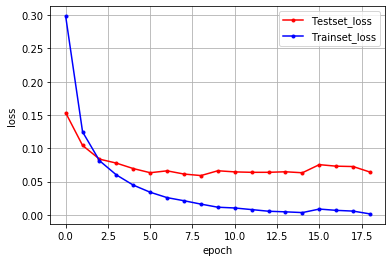

In [8]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']
# 학습 셋의 오차
y_loss = history.history['loss']
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker=".", c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker=".", c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()